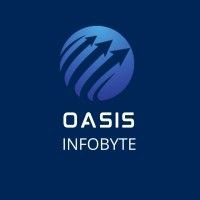

# Oasis Infobyte Data Science Internship

# BY SHREYA BILTHERIA

## Task 5: SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

### DESCRIPTION

Sales prediction involves a careful consideration of various factors, such as the financial resources allocated to advertising, the specific audience segments targeted, and the choice of advertising platforms. As we navigate through this task, we will be challenged to develop predictive models that uncover the intricate relationships between our advertising investments and subsequent product sales.

This task invites us to employ machine learning techniques in Python, empowering us to make data-driven decisions about our advertising strategies.

By harnessing the capabilities of Python, we aim to create models that not only forecast sales but also guide us in optimizing our advertising costs. This task aligns perfectly with our goal of making informed and strategic decisions, ensuring that every step we take in advertising contributes to the overall growth and success of our business.

Key steps:-
    
1. Data Collection

2. Data Preprocessing

3. Feature Engineering

4. Model Selection

5. Model Training

6. Model Evaluation

7. Results Interpretation

## IMPORTING NECESSARY LIBRARIES AND LOADING THE DATASET

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
#loading the dataset
df= pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
#displaying first five entries
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#displaying last five entries
df.tail() 

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


## DATA PREPROCESSING AND EXPLORATION

In [6]:
#showing columns of the dataset
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

We can drop Unnamed column as it seems to be useless.

In [7]:
# Dropping Id columns because it's useless
df = df.drop(["Unnamed: 0"],axis=1)

In [8]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
#displaying first five entries after removing Unnamed column
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
#showing columns in the dataset
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
# Getting the size of the dataset
df.size

800

In [12]:
# Getting shape of the dataset
df.shape
     

(200, 4)

In [13]:
#showing datatypes in dataset
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [14]:
# Getting information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
#showing statistical summary of the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
#showing transpose of statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### Checking and treating null values

In [17]:
df.isnull() #Returns True or False based on presence of null values

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [18]:
df.notnull().sum()  #check for non-null values

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [19]:
df.isnull().sum() #checks for null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Dataset is free from missing values.

## DATA VISUALIZATION

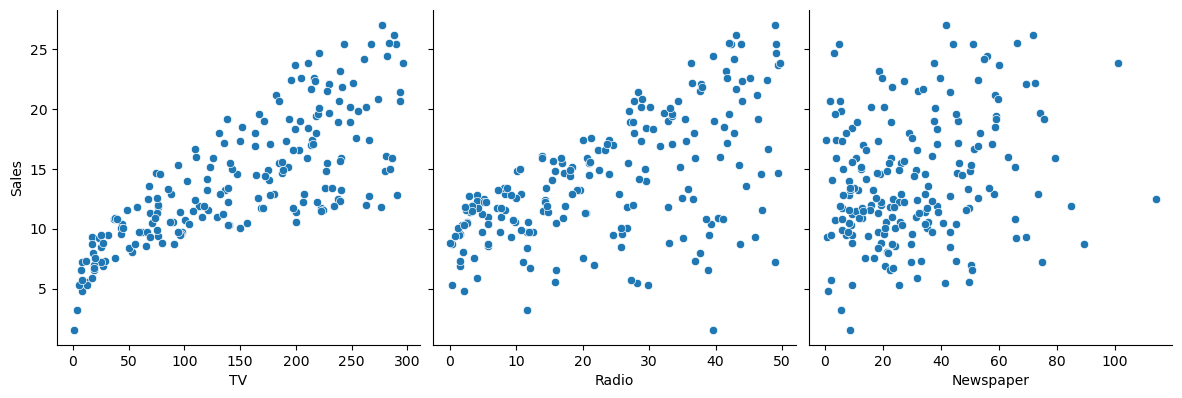

In [20]:
# Pairplot for a quick overview of relationships between variables
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

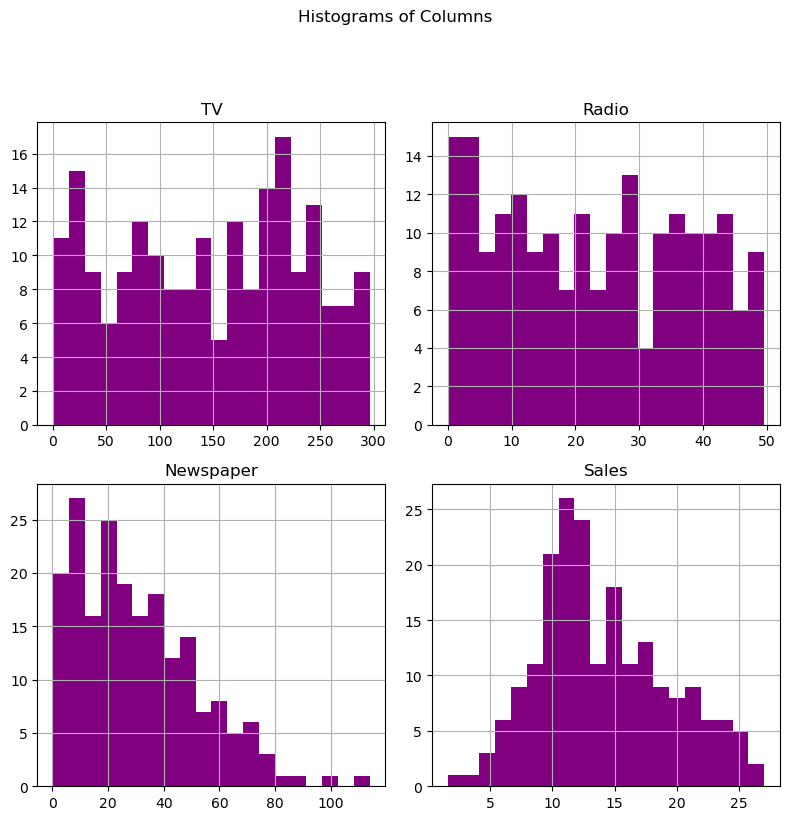

In [21]:
#plotting histogram
df.hist(figsize=(8, 8), color='purple', bins=20)
plt.suptitle('Histograms of Columns', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

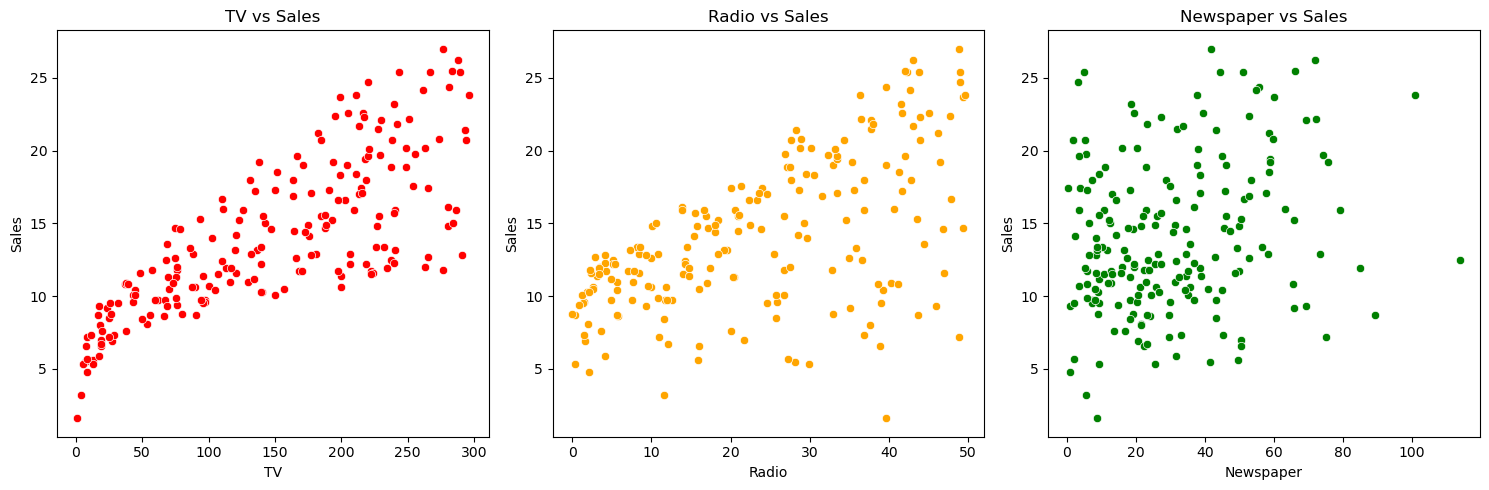

In [22]:
# Scatter plots for each variable against Sales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df,color='red')
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df,color='orange')
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df,color='green')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

## CORRELATION

In [23]:
#correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


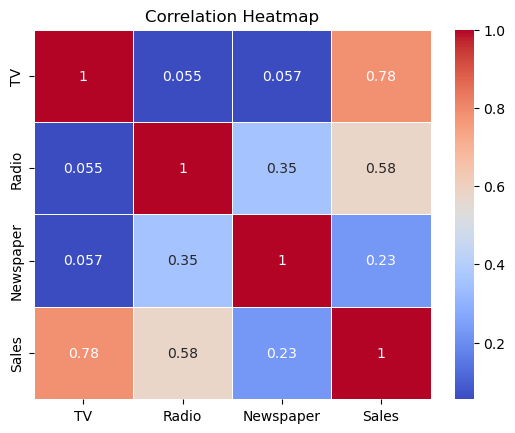

In [24]:
# Correlation heatmap to visualize the correlation between variables
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Summary for Correlation

1. **Strong Positive Correlation (0.782) between TV and Sales:**
   - Increasing TV advertising expenses strongly correlates with higher sales.
   

2. **Moderate Positive Correlation (0.576) between Radio and Sales:**
   - Higher radio advertising expenditures moderately correspond to increased sales.
   

3. **Weak Positive Correlation (0.228) for Newspaper and Sales:**
   - Newspaper advertising shows a weak positive correlation with sales compared to TV and radio.
   

4. **Weak Positive Correlation (0.057) between TV and Newspaper:**
   - TV and newspaper advertising are somewhat positively correlated, but the relationship is weak.
   

5. **Weak Positive Correlation (0.354) between Radio and Newspaper:**
   - Radio and newspaper advertising are weakly positively correlated.
   

6. **Very Weak Positive Correlation (0.055) between Radio and TV:**
   - There is no strong correlation between radio and TV advertising expenditures.
   

7. **Overall Positive Correlation:**
   - Higher advertising expenditures across TV, Radio, and Newspaper are generally associated with increased sales.

## SPLITING THE DATASET

In [25]:
x = df.iloc[:, 0:3]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [26]:
y = df.iloc[:, -1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

After splitting the dataset we can say that, 'Sales' is the target or dependent variable and TV', 'Radio', and 'Newspaper', are considered independent features or predictors.

### Train and test data splitting

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [28]:
from sklearn import metrics

## MODEL SELECTION, EVALUATION AND PREDICTION

### LINEAR REGRESSION

In [29]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [31]:
model.intercept_

2.979067338122629

In [32]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [33]:
# Mean Absolute Error
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_pred, y_test))

Mean Absolute Error:  1.4607567168117606


In [34]:
# Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Root Mean Squared Error: 1.7815996615334508


In [35]:
# R-Squared
print('R-Squared: ', metrics.r2_score(y_pred, y_test))

R-Squared:  0.8791069137120033


### Prediction

In [36]:
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


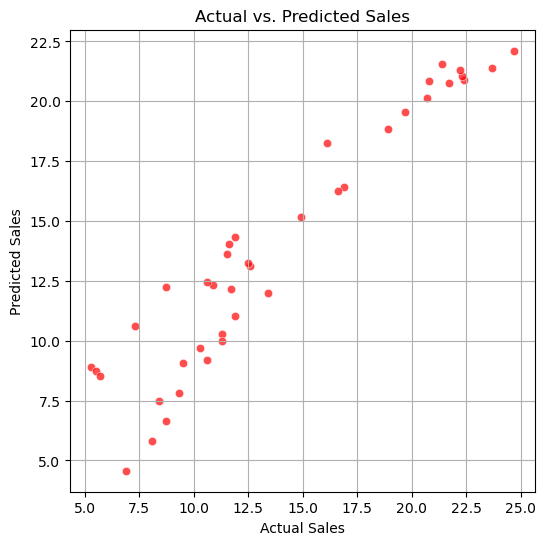

In [37]:
# Scatter plot of actual vs. predicted values linear regression
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='red', alpha=0.7)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

### DECISION TREE REGRESSOR

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [39]:
y_pred_tree = tree_model.predict(x_test)
print(y_pred_tree)

[18.5 20.7 20.2  6.6 23.8 13.3 22.6  9.7 11.7 14.1  3.2  8.6 12.5  6.6
 10.3 12.6  6.6 16.6 11.4 20.2 20.1 11.8 10.8 24.4  9.9  8.6 22.6 12.2
 10.6  3.2 11.6 10.9 20.7  9.3 15.7 20.7 13.6 20.2 12.4  7.6]


In [40]:
print('Mean Absolute Error (Decision Tree): ', metrics.mean_absolute_error(y_pred_tree, y_test))
print('Root Mean Squared Error (Decision Tree):', np.sqrt(metrics.mean_squared_error(y_pred_tree, y_test)))
print('R-Squared (Decision Tree): ', metrics.r2_score(y_pred_tree, y_test))

Mean Absolute Error (Decision Tree):  0.9850000000000001
Root Mean Squared Error (Decision Tree): 1.4747881203752624
R-Squared (Decision Tree):  0.9329452766016975


In [41]:
# Creating a DataFrame for Decision Tree Regressor
act_pred_decision_tree = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predict (Decision Tree)': y_pred_tree.flatten()})

# Displaying the DataFrame
print(act_pred_decision_tree)

    Actual  Predict (Decision Tree)
0     16.9                     18.5
1     22.4                     20.7
2     21.4                     20.2
3      7.3                      6.6
4     24.7                     23.8
5     12.6                     13.3
6     22.3                     22.6
7      8.4                      9.7
8     11.5                     11.7
9     14.9                     14.1
10     9.5                      3.2
11     8.7                      8.6
12    11.9                     12.5
13     5.3                      6.6
14    10.3                     10.3
15    11.7                     12.6
16     5.5                      6.6
17    16.6                     16.6
18    11.3                     11.4
19    18.9                     20.2
20    19.7                     20.1
21    12.5                     11.8
22    10.9                     10.8
23    22.2                     24.4
24     9.3                      9.9
25     8.1                      8.6
26    21.7                  

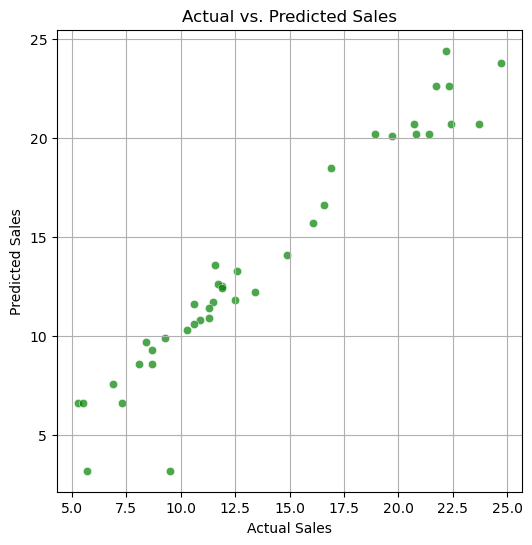

In [42]:
# Scatter plot of actual vs. predicted values Decision tree regressor
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, color='green', alpha=0.7)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

### SVM REGRESSOR

In [43]:
from sklearn.svm import SVR

# Create and train the Support Vector Machine Regressor
svm_model = SVR()
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(x_test)

# Display the predictions
print(y_pred_svm)

# Evaluate the model
print('Mean Absolute Error (SVM): ', metrics.mean_absolute_error(y_pred_svm, y_test))
print('Root Mean Squared Error (SVM):', np.sqrt(metrics.mean_squared_error(y_pred_svm, y_test)))
print('R-Squared (SVM): ', metrics.r2_score(y_pred_svm, y_test))


[16.82433682 19.737857   18.51883217  8.49757937 19.14449648 12.35892516
 19.35370785  8.670194   14.26079367 15.69961405  8.67459241  8.63883765
 16.10338892  7.86941414 11.80945227 13.73449615  7.82912158 16.07178231
 10.8096626  17.39870345 19.02145965 12.85124102  9.98938778 19.67786747
  9.38640699  8.22363571 19.35662438 12.9459954  10.6084116   7.91787133
 13.69013745 10.3362837  20.05661258  9.88723936 17.12640815 17.96277376
 11.10345511 18.94964504 12.02692034  7.21381614]
Mean Absolute Error (SVM):  1.5143575865941807
Root Mean Squared Error (SVM): 2.0015107804936174
R-Squared (SVM):  0.7781919098410419


In [44]:
# Creating a DataFrame for SVM
act_pred_svm = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predict (SVM)': y_pred_svm.flatten()})

# Displaying the DataFrame
print(act_pred_svm)

    Actual  Predict (SVM)
0     16.9      16.824337
1     22.4      19.737857
2     21.4      18.518832
3      7.3       8.497579
4     24.7      19.144496
5     12.6      12.358925
6     22.3      19.353708
7      8.4       8.670194
8     11.5      14.260794
9     14.9      15.699614
10     9.5       8.674592
11     8.7       8.638838
12    11.9      16.103389
13     5.3       7.869414
14    10.3      11.809452
15    11.7      13.734496
16     5.5       7.829122
17    16.6      16.071782
18    11.3      10.809663
19    18.9      17.398703
20    19.7      19.021460
21    12.5      12.851241
22    10.9       9.989388
23    22.2      19.677867
24     9.3       9.386407
25     8.1       8.223636
26    21.7      19.356624
27    13.4      12.945995
28    10.6      10.608412
29     5.7       7.917871
30    10.6      13.690137
31    11.3      10.336284
32    23.7      20.056613
33     8.7       9.887239
34    16.1      17.126408
35    20.7      17.962774
36    11.6      11.103455
37    20.8  

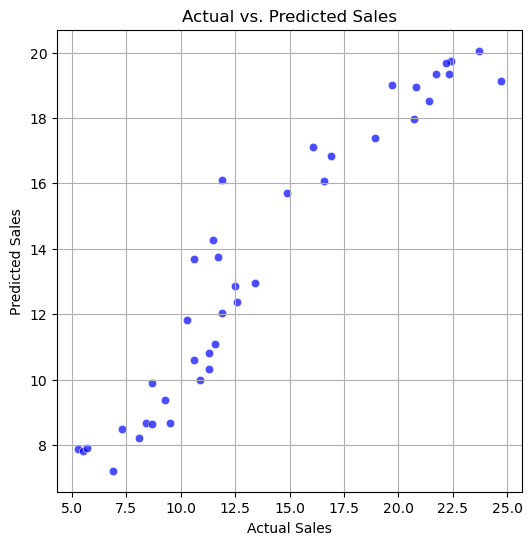

In [45]:
# Scatter plot of actual vs. predicted values SVM regressor
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_svm, color='blue', alpha=0.7)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

### RANDOM FOREST REGRESSOR

In [46]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
# Making predictions on the test set
y_pred_random_forest = random_forest_model.predict(x_test)

In [48]:
# Calculating evaluation metrics
random_forest_mae = metrics.mean_absolute_error(y_test, y_pred_random_forest)
random_forest_mse = metrics.mean_squared_error(y_test, y_pred_random_forest)
random_forest_r2 = metrics.r2_score(y_test, y_pred_random_forest)

print(f'Random Forest - MAE: {random_forest_mae}, MSE: {random_forest_mse}, R-Squared: {random_forest_r2}')

Random Forest - MAE: 0.6200999999999988, MSE: 0.5907322499999988, R-Squared: 0.9812843792541843


### Predictions

In [49]:
# Creating a DataFrame for Random Forest
act_pred_random_forest = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predict (Random Forest)': y_pred_random_forest.flatten()})

# Displaying the DataFrame for Random Forest
print(act_pred_random_forest)

    Actual  Predict (Random Forest)
0     16.9                   17.698
1     22.4                   21.804
2     21.4                   20.628
3      7.3                    6.793
4     24.7                   22.927
5     12.6                   13.379
6     22.3                   22.376
7      8.4                    9.688
8     11.5                   11.826
9     14.9                   15.540
10     9.5                    7.344
11     8.7                    9.059
12    11.9                   12.109
13     5.3                    4.826
14    10.3                   10.522
15    11.7                   12.690
16     5.5                    6.490
17    16.6                   16.440
18    11.3                   11.368
19    18.9                   19.732
20    19.7                   20.181
21    12.5                   12.884
22    10.9                   10.330
23    22.2                   22.178
24     9.3                    9.993
25     8.1                    9.006
26    21.7                  

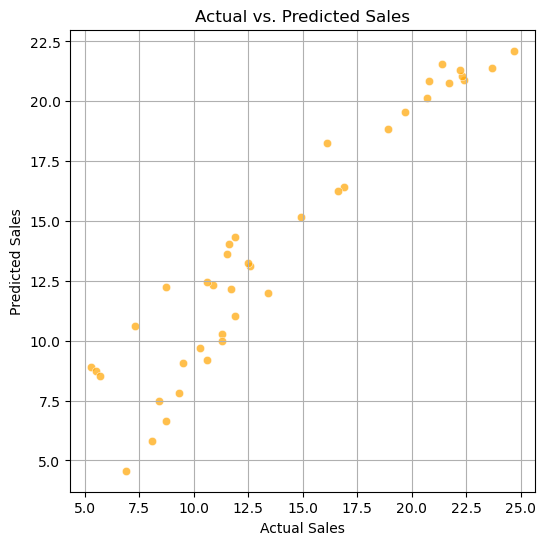

In [50]:
# Scatter plot of actual vs. predicted values Random Forest
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='orange', alpha=0.7)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

### XG Boost

In [51]:
#XGBRegressor
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(random_state=42)
xgboost_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [52]:
# Making predictions on the test set
y_pred_xgboost = xgboost_model.predict(x_test)

In [53]:
# Calculating evaluation metrics
xgboost_mae = metrics.mean_absolute_error(y_test, y_pred_xgboost)
xgboost_mse = metrics.mean_squared_error(y_test, y_pred_xgboost)
xgboost_r2 = metrics.r2_score(y_test, y_pred_xgboost)

print(f'XGBoost - MAE: {xgboost_mae}, MSE: {xgboost_mse}, R-Squared: {xgboost_r2}')

XGBoost - MAE: 0.7258287668228147, MSE: 0.8689325216764425, R-Squared: 0.9724704186551494


In [54]:
# Creating a DataFrame for XGBoost
act_pred_xgboost = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predict (XGBoost)': y_pred_xgboost.flatten()})

# Displaying the DataFrame for XGBoost
print(act_pred_xgboost)

    Actual  Predict (XGBoost)
0     16.9          16.743177
1     22.4          21.229593
2     21.4          20.291897
3      7.3           6.426660
4     24.7          23.943264
5     12.6          13.655435
6     22.3          23.614056
7      8.4           9.516398
8     11.5          11.755810
9     14.9          14.561708
10     9.5           7.800208
11     8.7           8.713922
12    11.9          12.366092
13     5.3           4.199776
14    10.3          10.364231
15    11.7          12.237412
16     5.5           4.204163
17    16.6          16.669416
18    11.3          11.854455
19    18.9          18.875397
20    19.7          20.572220
21    12.5          12.082775
22    10.9          10.684776
23    22.2          22.410221
24     9.3          10.432509
25     8.1           8.701328
26    21.7          23.496649
27    13.4          12.276189
28    10.6          10.051743
29     5.7           5.304979
30    10.6          11.169519
31    11.3          10.933059
32    23.7

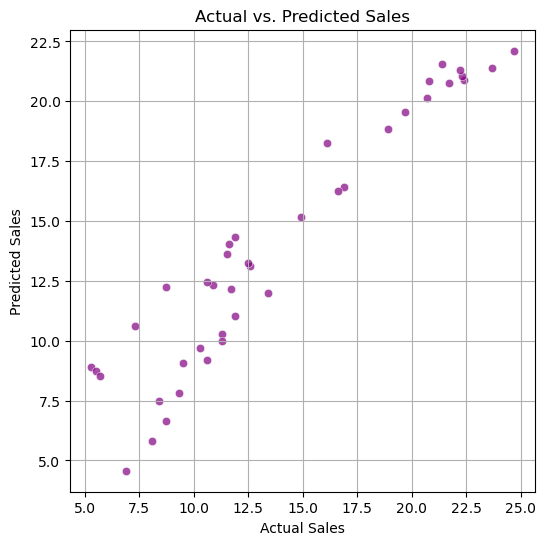

In [55]:
# Scatter plot of actual vs. predicted values XGBRegressor
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

## Cross Validations(using mae)

In [56]:
from sklearn.model_selection import cross_val_score

# Linear Regression Cross-Validation
linear_regression_cv_scores = cross_val_score(LinearRegression(), x_train, y_train, scoring='neg_mean_absolute_error', cv=5)
linear_regression_cv_mae = -linear_regression_cv_scores.mean()

# Decision Tree Regressor Cross-Validation
decision_tree_cv_scores = cross_val_score(DecisionTreeRegressor(random_state=42), x_train, y_train, scoring='neg_mean_absolute_error', cv=5)
decision_tree_cv_mae = -decision_tree_cv_scores.mean()

# Support Vector Machine (SVM) Cross-Validation
svm_cv_scores = cross_val_score(SVR(), x_train, y_train, scoring='neg_mean_absolute_error', cv=5)
svm_cv_mae = -svm_cv_scores.mean()

# Cross-validation for Random Forest Regressor
random_forest_cv_scores = cross_val_score(RandomForestRegressor(random_state=42), x_train, y_train, scoring='neg_mean_absolute_error', cv=5)
random_forest_cv_mae = -random_forest_cv_scores.mean()

# Cross-validation for XGBoost Regressor
xgboost_cv_scores = cross_val_score(XGBRegressor(random_state=42), x_train, y_train, scoring='neg_mean_absolute_error', cv=5)
xgboost_cv_mae = -xgboost_cv_scores.mean()

# Displaying Cross-Validation Mean Absolute Error (MAE)
print(f'Linear Regression CV MAE: {linear_regression_cv_mae}')
print(f'Decision Tree CV MAE: {decision_tree_cv_mae}')
print(f'SVM CV MAE: {svm_cv_mae}')
print(f'Random Forest Cross-Validation MAE: {random_forest_cv_mae}')
print(f'XGBoost Cross-Validation MAE: {xgboost_cv_mae}')

Linear Regression CV MAE: 1.2452531983037354
Decision Tree CV MAE: 0.94375
SVM CV MAE: 1.6960739203752706
Random Forest Cross-Validation MAE: 0.6079875000000001
XGBoost Cross-Validation MAE: 0.6109077979624271


## CONCLUSIONS

Summary of the cross-validated MAE and metrics (MAE, MSE, R-Squared) for each model :-

1. **Linear Regression:**
   - Cross-Validation MAE: 1.25
   - MAE: 1.46
   - MSE: 3.17
   - R-Squared: 0.87
   - Linear Regression performs reasonably well, with a moderate MAE and good R-Squared.

2. **Decision Tree Regressor:**
   - Cross-Validation MAE: 0.94
   - MAE: 0.99
   - MSE: 2.18
   - R-Squared: 0.93
   - Decision Tree Regressor shows good performance with a low MAE and high R-Squared.

3. **Support Vector Machine (SVM):**
   - Cross-Validation MAE: 1.70
   - MAE: 1.51
   - MSE: 4.01
   - R-Squared: 0.78
   - SVM has a higher MAE compared to other models, indicating a less accurate prediction.

4. **Random Forest Regressor:**
   - Cross-Validation MAE: 0.6079
   - MAE: 0.62
   - MSE: 0.59
   - R-Squared: 0.98
   - Random Forest Regressor performs exceptionally well with the lowest MAE and high R-Squared.

5. **XGBoost Regressor:**
   - Cross-Validation MAE: 0.6109
   - MAE: 0.73
   - MSE: 0.87
   - R-Squared: 0.97
   - XGBoost shows good performance, with a slightly higher MAE compared to Random Forest.

In summary, both Random Forest and XGBoost outperform other models, with Random Forest having the lowest MAE and highest R-Squared among all models.

In the task of predicting sales, we explored and compared the performance of various regression models: Linear Regression, Decision Tree Regressor, Support Vector Machine (SVM), Random Forest Regressor, and XGBoost Regressor. Each model underwent cross-validation, and their predictive capabilities were evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-Squared.

**Key Findings:**

1. **Linear Regression:** Showed reasonable performance with a moderate MAE and a good R-Squared, indicating a satisfactory fit to the data.

2. **Decision Tree Regressor:** Demonstrated excellent predictive power, providing a low MAE and a high R-Squared, making it a robust choice for sales prediction.

3. **Support Vector Machine (SVM):** While SVM exhibited a higher MAE compared to other models, it still delivered a reasonable prediction accuracy.

4. **Random Forest Regressor:** Stood out as a top performer with the lowest MAE and a remarkably high R-Squared, showcasing its strong ability to capture complex relationships within the data.

5. **XGBoost Regressor:** Performed well, with a slightly higher MAE than Random Forest but still achieving a high R-Squared, making it a competitive option for sales prediction.

**Overall, both Random Forest and XGBoost emerged as standout models,** surpassing others in terms of predictive accuracy. The choice between them may depend on specific requirements and the desired balance between accuracy and computational efficiency.

In conclusion, this analysis provides valuable insights for selecting an appropriate model for sales prediction based on the dataset's characteristics and the desired level of interpretability and accuracy. The success of these models in predicting sales highlights the potential for leveraging machine learning techniques in real-world business scenarios.

## A big thank you to the OASIS INFOBYTE for this opportunity! I'm grateful for the mentors and the team for their amazing support. This experience boosted my skills in data science and machine learning. I'm excited to use this knowledge ahead. Thanks for this incredible learning experience!